# Confusion matrix example

https://androidkt.com/keras-confusion-matrix-in-tensorboard/

## Imports and version check

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras.datasets import mnist

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

print(pd.__version__)
print(sns.__version__)
print(tf.__version__)
print(keras.__version__)

1.0.0
0.9.0
2.2.0
2.3.0-tf


## Load Keras mnist dataset

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
 
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize 
train_images, test_images = train_images / 255.0, test_images / 255.0
 
classes=[0,1,2,3,4,5,6,7,8,9]

In [7]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
 
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
model.fit(x=train_images, 
            y=train_labels, 
            epochs=5, 
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1462 - accuracy: 0.9554 - val_loss: 0.0559 - val_accuracy: 0.9834
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0481 - accuracy: 0.9851 - val_loss: 0.0393 - val_accuracy: 0.9875
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0349 - accuracy: 0.9884 - val_loss: 0.0346 - val_accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0259 - accuracy: 0.9923 - val_loss: 0.0401 - val_accuracy: 0.9864
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0215 - accuracy: 0.9931 - val_loss: 0.0318 - val_accuracy: 0.9901


In [8]:
y_true=test_labels
y_pred=model.predict_classes(test_images)
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [9]:
classes=[0,1,2,3,4,5,6,7,8,9]

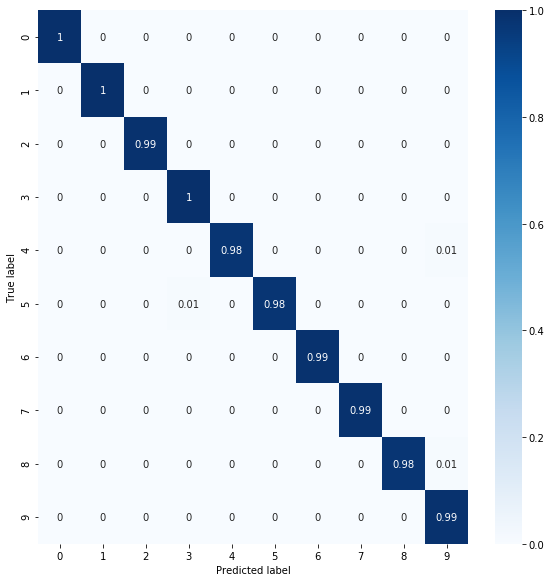

In [10]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [11]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
%load_ext tensorboard

In [13]:
logdir='log'

In [14]:
file_writer = tf.summary.create_file_writer(logdir + '/cm')

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  test_pred = model1.predict_classes(test_images)

  con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=test_pred).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  
  buf = io.BytesIO()
  plt.savefig(buf, format='png')

  plt.close(figure)
  buf.seek(0)
  image = tf.image.decode_png(buf.getvalue(), channels=4)

  image = tf.expand_dims(image, 0)
  
  # Log the confusion matrix as an image summary.
  with file_writer.as_default():
    tf.summary.image("Confusion Matrix", image, step=epoch)

    
logdir='logs/images'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

NameError: name 'io' is not defined

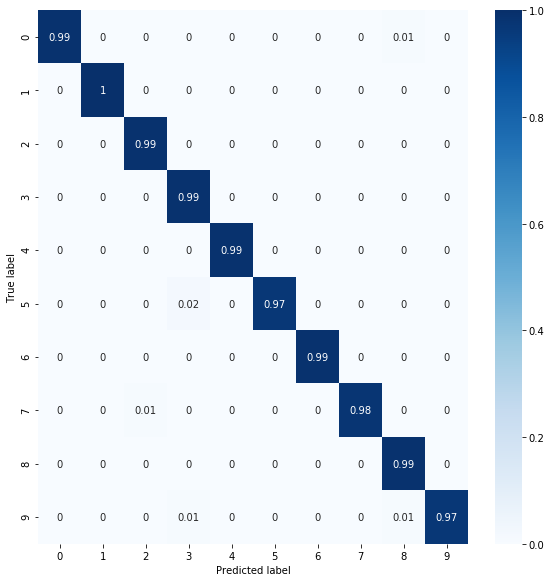

In [15]:
model1.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=0, 
    callbacks=[tensorboard_callback, cm_callback],
    validation_data=(test_images, test_labels),
)

In [18]:
# Start TensorBoard.
!kill 16954
%tensorboard --logdir logs/images

/bin/sh: 1: kill: No such process



Reusing TensorBoard on port 6006 (pid 16954), started 1 day, 19:06:29 ago. (Use '!kill 16954' to kill it.)